In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
pf = df.profile_report()
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
pf.to_file("ai4i2020.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

<AxesSubplot:>

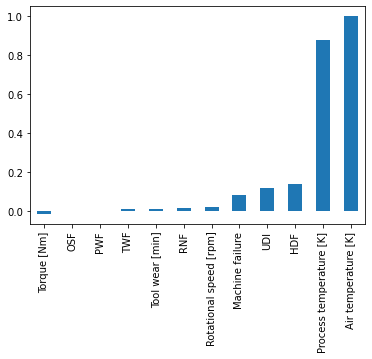

In [32]:
df.corr()["Air temperature [K]"].sort_values().plot.bar()

In [11]:
X = df[['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
        'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
y = df["Air temperature [K]"]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [33]:
model.fit(X,y)

LinearRegression()

In [37]:
np.random.randint(100,900,10)

array([868, 264, 231, 106, 829, 140, 496, 287, 441, 107])

In [54]:
np.random.seed(101)
pred = []
for i in np.random.randint(100,900,10):
    predict = model.predict([X.iloc[i]])
    pred.append(predict)

C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X

In [55]:
model_pred = []
for i in pred:
    model_pred.append(i[0])

In [56]:
model_pred

[300.1637917564463,
 297.9781272884212,
 298.8935224047236,
 298.4268945402424,
 297.714192048164,
 299.1517173616114,
 299.01762676747677,
 297.73978956218804,
 298.8935224047236,
 296.5356978789888]

In [58]:
np.random.seed(101)
actual_air_temp = []
for i in np.random.randint(100,900,10):
    actual_air_temp.append(y.iloc[i])

In [59]:
actual_air_temp

[298.4, 297.3, 297.8, 297.5, 298.2, 297.5, 297.7, 296.7, 297.8, 296.1]

In [70]:
np.random.seed(101)
df_result = pd.DataFrame(data=model_pred, index=np.random.randint(100,900,10), columns=["predicted_air_temp"])
df_result

,predicted_air_temp
623,300.163792
437,297.978127
675,298.893522
699,298.426895
175,297.714192
493,299.151717
652,299.017627
744,297.739790
675,298.893522
857,296.535698


In [71]:
df_result["actual_air_temp"] = actual_air_temp

In [72]:
df_result

,predicted_air_temp,actual_air_temp
623,300.163792,298.4
437,297.978127,297.3
675,298.893522,297.8
699,298.426895,297.5
175,297.714192,298.2
493,299.151717,297.5
652,299.017627,297.7
744,297.739790,296.7
675,298.893522,297.8
857,296.535698,296.1


In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [74]:
r2_score(y_pred=df_result["predicted_air_temp"], y_true=df_result["actual_air_temp"])

-2.075204050452766

In [82]:
mean_absolute_error(y_pred=df_result["predicted_air_temp"], y_true=df_result["actual_air_temp"])

1.0486497916658153

In [83]:
mean_squared_error(y_pred=df_result["predicted_air_temp"], y_true=df_result["actual_air_temp"])

1.2792848849883205

In [84]:
np.sqrt(mean_squared_error(y_pred=df_result["predicted_air_temp"], y_true=df_result["actual_air_temp"]))

1.1310547665733612

In [75]:
model.coef_

array([ 1.17376384e+00,  1.90233804e-04,  2.67890316e-04,  8.45451276e-05,
       -9.00858666e-02,  2.01756471e-01,  1.77926496e+00,  1.41970075e-01,
       -4.04797285e-02, -5.72344840e-02])

In [76]:
model.intercept_

-64.20013022354306

In [79]:
model.score(X,y)

0.775666013666106